## Тензоры в PyTorch

In [2]:
import torch
torch.__version__

'2.4.1+cu121'

#### Использование GPU

In [98]:
!nvidia-smi

Mon Sep 23 21:16:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.80                 Driver Version: 546.80       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   45C    P8               3W /  55W |    220MiB /  8188MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [97]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
print(torch.cuda.get_device_name(0))  # изначально будет запускаться на GPU

NVIDIA GeForce RTX 4060 Laptop GPU


#### `Введение в понятие тензора`

In [4]:
t1 = torch.Tensor(3, 3)  # создает тензор заданной длины
t1

tensor([[1.8140e+24, 1.6031e-42, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [5]:
t1.shape, t1.ndim, t1.type()  # (размер, количество размерностей, тип данных внутри)

(torch.Size([3, 3]), 2, 'torch.FloatTensor')

In [6]:
t1.device  # проверка на каком устройстве тензор

device(type='cpu')

In [7]:
t1 = t1.to('cuda')  # переносим тензор на GPU

In [8]:
t1.device

device(type='cuda', index=0)

#### `Перевод массива в тензор`

In [9]:
import numpy as np

In [10]:
ar = np.array([[1, 2, 3], [4, 5, 6]])
t = torch.from_numpy(ar)  # тензор будет ссылаться на массив
t

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [11]:
t[0, 0] = 5
ar, t

(array([[5, 2, 3],
        [4, 5, 6]]),
 tensor([[5, 2, 3],
         [4, 5, 6]], dtype=torch.int32))

In [12]:
tt = torch.from_numpy(ar.copy())  # теперь тензор не ссылается на массив, а копирует его значения
ar[0, 0] = 1
ar, tt

(array([[1, 2, 3],
        [4, 5, 6]]),
 tensor([[5, 2, 3],
         [4, 5, 6]], dtype=torch.int32))

In [13]:
t_np = t.numpy()  # перевод тензора в массив
t_np

array([[1, 2, 3],
       [4, 5, 6]])

#### `Семя рандома`

In [14]:
torch.manual_seed(42)  # ставим семя рандома

In [15]:
torch.cuda.manual_seed_all(42)  # ставим семя рандома

Отключение стахостического режима работы GPU

In [16]:
torch.backends.cudnn.deterministic = True

In [17]:
torch.backends.cudnn.benchmark = False

#### `Тензор с заданными значениями и размерностью`

In [18]:
torch.zeros(2, 3, dtype=torch.int32)  # тензор из нулей

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [19]:
torch.ones(2, 3, dtype=torch.int32)  # тензор из единиц

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)

In [20]:
torch.eye(3)  # единичная матрица 3х3

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [21]:
torch.full((2, 3), 5)  # тензор размера (2, 3), который заполняется переданным значением 5

tensor([[5, 5, 5],
        [5, 5, 5]])

In [22]:
torch.arange(-6, 6, 2)  # арифметическая прогрессия от -6 до 6 с шагом 2

tensor([-6, -4, -2,  0,  2,  4])

In [23]:
torch.linspace(1, 5, 5)  # тензор со значениями от 1 до 5, в котором 5 значений с равным шагом изменения

tensor([1., 2., 3., 4., 5.])

In [24]:
torch.rand(2, 3)  # тензор размером (2. 3), который заполняется случайными величинами от 0 до 1 по нормальному распределению

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

In [25]:
torch.randn(2, 3)  # тензор размером (2. 3), который заполняется случайными величинами от -1 до 1, мат ожидание = 0

tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])

#### `Виды методов`

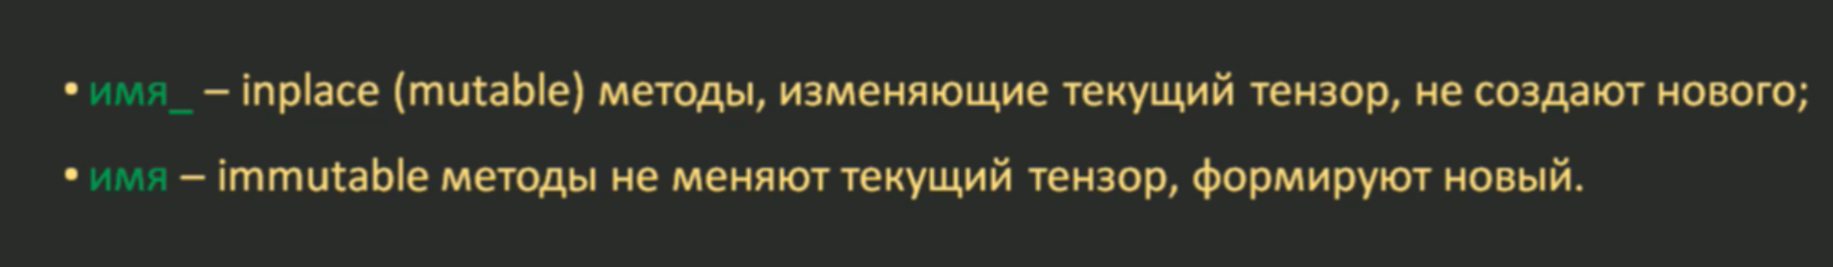

In [26]:
t = torch.FloatTensor(2, 5)

In [27]:
t

tensor([[1.8142e+24, 1.6031e-42, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [28]:
t.zero_()  # inplace метод zero_

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [29]:
torch.arange(7)  # immutable метод arange

tensor([0, 1, 2, 3, 4, 5, 6])

#### `Изменение размерности тензора`

In [30]:
t = torch.FloatTensor(27)
t

tensor([1.8701e+24, 1.6031e-42, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00])

View

In [31]:
t.view(3, 9)  # изменили размерность на (3, 5)

tensor([[1.8701e+24, 1.6031e-42, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00]])

Reshape

In [32]:
t.reshape(3, 3, 3)  # изменили размерность на (3, 3, 3)

tensor([[[1.8701e+24, 1.6031e-42, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]])

Resize

In [33]:
t.resize_(2, 3)  # полностью изменили начальный тензор на (2, 3), взяв первые элементы

tensor([[1.8701e+24, 1.6031e-42, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

Ravel

In [34]:
t.ravel()  # получаем вектор из тензора

tensor([1.8701e+24, 1.6031e-42, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

Permute (полезно для аугментации изображений)

In [35]:
x_original = torch.rand(size=(224, 224, 3)) # [height, width, colour_channels]

In [95]:
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0-1, 1-2, 2->0

In [96]:
print (f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}") # [colour_channels, height, width]

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


Транспонирование

In [37]:
t.mT, t.T

(tensor([[1.8701e+24, 0.0000e+00],
         [1.6031e-42, 0.0000e+00],
         [0.0000e+00, 0.0000e+00]]),
 tensor([[1.8701e+24, 0.0000e+00],
         [1.6031e-42, 0.0000e+00],
         [0.0000e+00, 0.0000e+00]]))

Squeeze / unsqueeze

In [38]:
t = torch.arange(32).view(8, 2, 2)
t.shape

torch.Size([8, 2, 2])

In [39]:
t1 = torch.unsqueeze(t, dim=1)  # добавляем 1 ось
t1.shape

torch.Size([8, 1, 2, 2])

In [40]:
t2 = torch.squeeze(t1)  # удаляет все размерности, которые содержат ровно 1 элемент
t2.shape

torch.Size([8, 2, 2])

In [41]:
t3 = torch.squeeze(t1, dim=-1)  # удаляет заданную размерность тензора, если она содержит 1 элемент
t4 = torch.squeeze(t1, dim=1)
t3.shape, t4.shape

(torch.Size([8, 1, 2, 2]), torch.Size([8, 2, 2]))

In [42]:
x = torch.arange(1, 10)

Reshape

In [43]:
x_reshaped = x.reshape(3, 3)
x_reshaped

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Stack

In [44]:
torch.stack([x, x, x], 0)  # конкатенирует тензоры; 0 - по 0 оси, 1 - по 1 оси

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [45]:
torch.hstack([x, x, x])  # добавляет элементы друг за другом в конец

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6,
        7, 8, 9])

In [46]:
torch.vstack([x, x, x])  # torch.stacak с dim=0

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]])

#### `Индексирование и срезы`

Одномерный случай

In [47]:
t = torch.arange(12)
t[-1].item(), t[-1]  # само число, тензор с нужным элементом

(11, tensor(11))

In [48]:
t[-1] = 100  # изменение тензора
t

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10, 100])

In [49]:
t[:4] = torch.IntTensor([-1, -2, -3, -4])
t

tensor([ -1,  -2,  -3,  -4,   4,   5,   6,   7,   8,   9,  10, 100])

Многомерный случай

In [50]:
t = torch. IntTensor([(1, 2, 3), (10, 20, 30), (100, 200, 300)])
t

tensor([[  1,   2,   3],
        [ 10,  20,  30],
        [100, 200, 300]], dtype=torch.int32)

In [51]:
t[0], t[0, 0]

(tensor([1, 2, 3], dtype=torch.int32), tensor(1, dtype=torch.int32))

In [52]:
t[:, 1]  # первый столбец тензора

tensor([  2,  20, 200], dtype=torch.int32)

In [53]:
t[..., 1]  # вместо ... подставляеются все значения для пропущенных размерностей

tensor([  2,  20, 200], dtype=torch.int32)

In [54]:
t = torch.arange(10)
t

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
a = t[[0, 2, -1]]  # создается новый тензор, содержащий значения под заданными индексами

In [56]:
a[[0, -1]] = 100  # значения под заданными индексами изменяются
a, t

(tensor([100,   2, 100]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

#### `Основные математические операции`

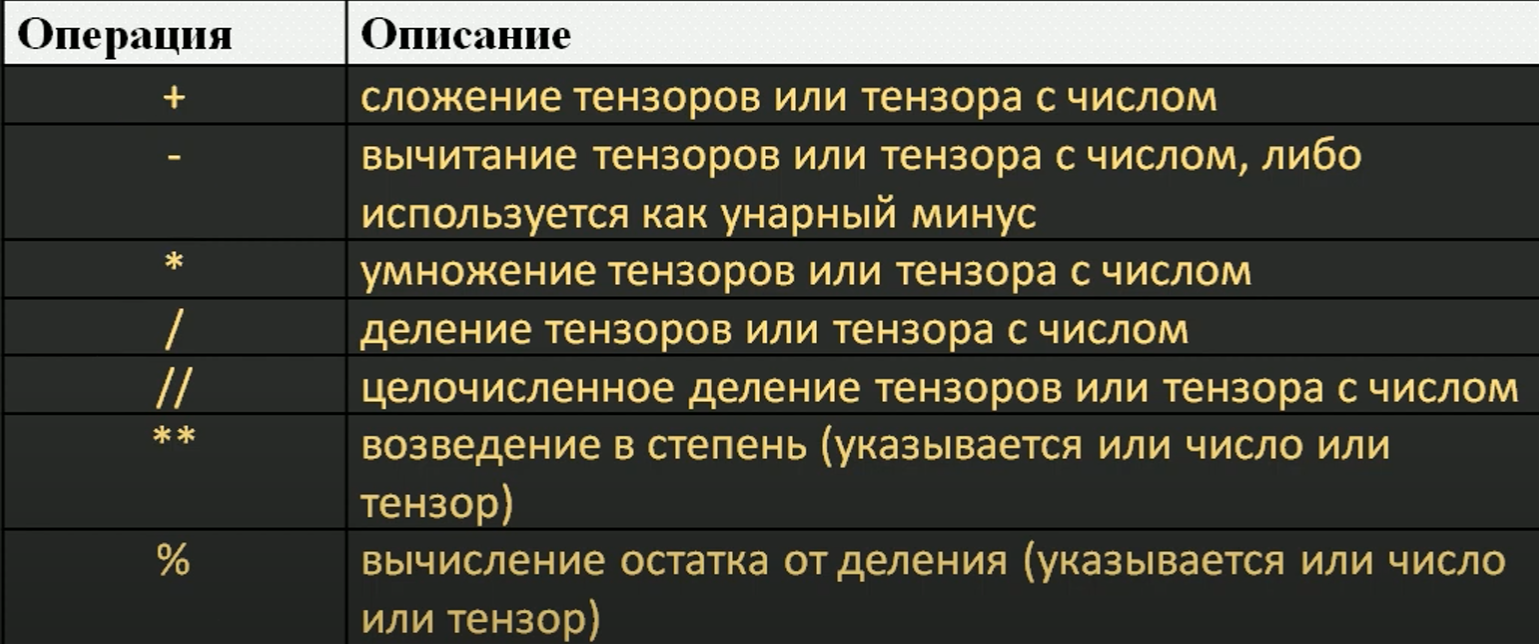

Поэлементные операции

In [57]:
t = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])

In [58]:
t - 3  # от каждого значения внутри тензора отнимается 3

tensor([[-2., -1.,  0.],
        [ 1.,  2.,  3.]])

In [59]:
-t  # все значения становятся отрицательными

tensor([[-1., -2., -3.],
        [-4., -5., -6.]])

In [60]:
t * 2  # каждое значение умножается на 2

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [61]:
t ** 3  # каждое значение возводится в куб

tensor([[  1.,   8.,  27.],
        [ 64., 125., 216.]])

In [62]:
t1 = torch.FloatTensor([4, 5, 6])

In [63]:
t - t1  # вычитаются соответственные значения в тензорах (то же самое для др операций)

tensor([[-3., -3., -3.],
        [ 0.,  0.,  0.]])

#### `Статестические и математические функции`

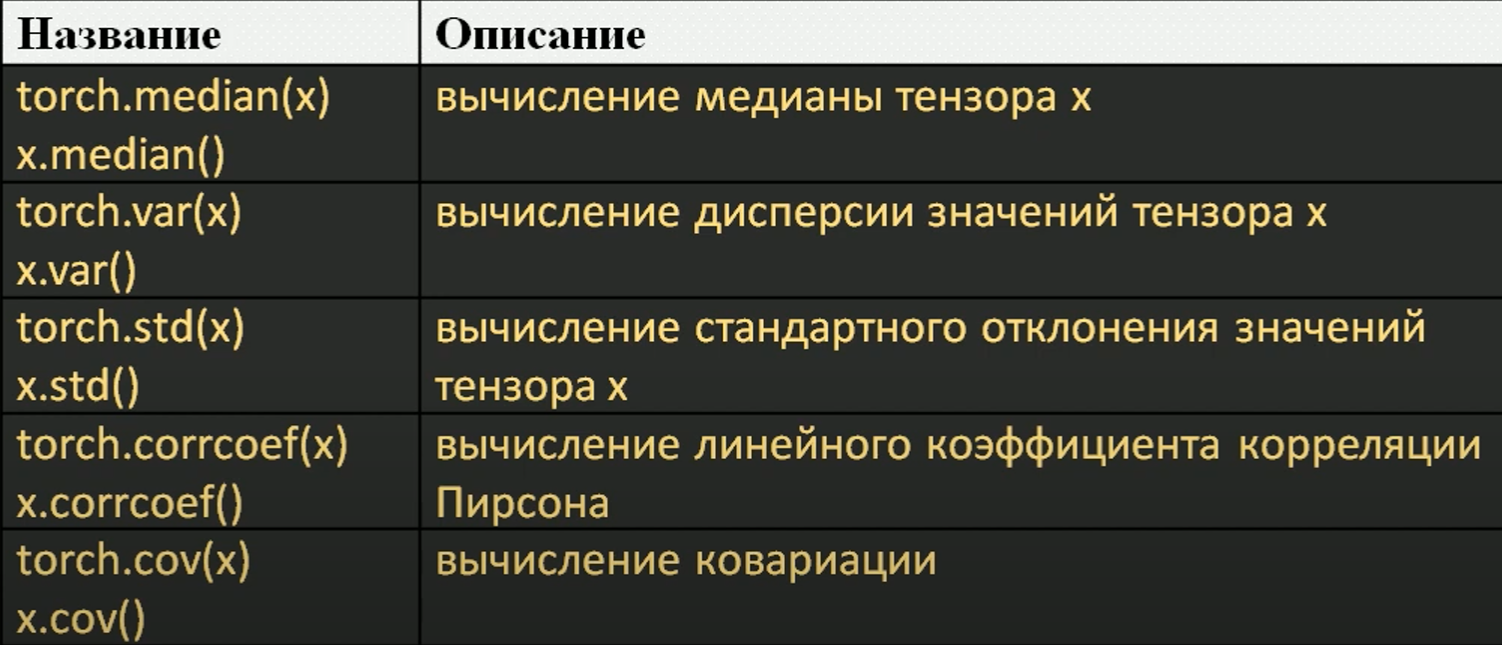

In [64]:
a = torch.arange(12)
a.max()

tensor(11)

In [65]:
b = torch.arange(12).view(3, 4)
b.max()  # применяется вне зависимости от размерности тензора

tensor(11)

In [66]:
b

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [67]:
b.sum(dim=0), b.sum(dim=1)  # сумма вычисляется по переданной размерности (0 - столбец, 1 - строка)

(tensor([12, 15, 18, 21]), tensor([ 6, 22, 38]))

In [68]:
b.max(dim=0)  # сами максимальные значения и их индексы в размерности

torch.return_types.max(
values=tensor([ 8,  9, 10, 11]),
indices=tensor([2, 2, 2, 2]))

In [69]:
b.amax()  # самое наибольшее число в тензоре

tensor(11)

In [70]:
a = torch.linspace(0, torch.pi, 12)

In [71]:
a.sin()  # применение функции синуса к каждому элемену

tensor([ 0.0000e+00,  2.8173e-01,  5.4064e-01,  7.5575e-01,  9.0963e-01,
         9.8982e-01,  9.8982e-01,  9.0963e-01,  7.5575e-01,  5.4064e-01,
         2.8173e-01, -8.7423e-08])

In [72]:
a = torch.rand(3, 4)
b = torch.randn(3, 4)

In [73]:
ab = torch.vstack([a, b])  # соединяем 2 тензора в 1
ab

tensor([[ 0.8016,  0.3649,  0.6286,  0.9663],
        [ 0.7687,  0.4566,  0.5745,  0.9200],
        [ 0.3230,  0.8613,  0.0919,  0.3102],
        [-0.5616, -0.5870,  0.3775, -0.0128],
        [ 0.2130, -0.6137, -0.3619, -0.5029],
        [ 0.3480, -1.2122,  0.7990,  1.1848]])

In [74]:
ab.corrcoef()  # матрица корреляции

tensor([[ 1.0000,  0.9807, -0.6511,  0.2836,  0.3773,  0.8763],
        [ 0.9807,  1.0000, -0.4904,  0.1340,  0.3241,  0.7744],
        [-0.6511, -0.4904,  1.0000, -0.7559, -0.4075, -0.9046],
        [ 0.2836,  0.1340, -0.7559,  1.0000, -0.2681,  0.6963],
        [ 0.3773,  0.3241, -0.4075, -0.2681,  1.0000,  0.2476],
        [ 0.8763,  0.7744, -0.9046,  0.6963,  0.2476,  1.0000]])

In [75]:
ab.cov()  # ковариационная матрциа

tensor([[ 0.0661,  0.0518, -0.0548,  0.0339,  0.0357,  0.2369],
        [ 0.0518,  0.0422, -0.0330,  0.0128,  0.0245,  0.1673],
        [-0.0548, -0.0330,  0.1072, -0.1151, -0.0491, -0.3116],
        [ 0.0339,  0.0128, -0.1151,  0.2163, -0.0459,  0.3407],
        [ 0.0357,  0.0245, -0.0491, -0.0459,  0.1352,  0.0958],
        [ 0.2369,  0.1673, -0.3116,  0.3407,  0.0958,  1.1065]])

#### `Матричное произведение`

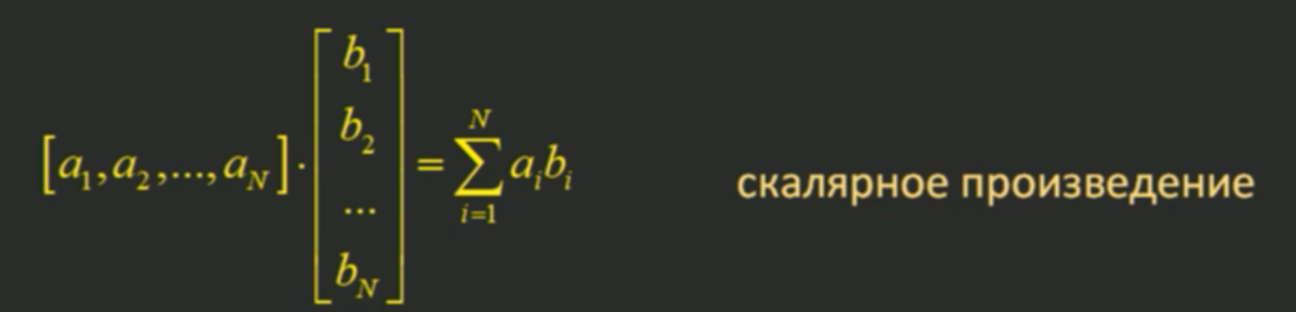

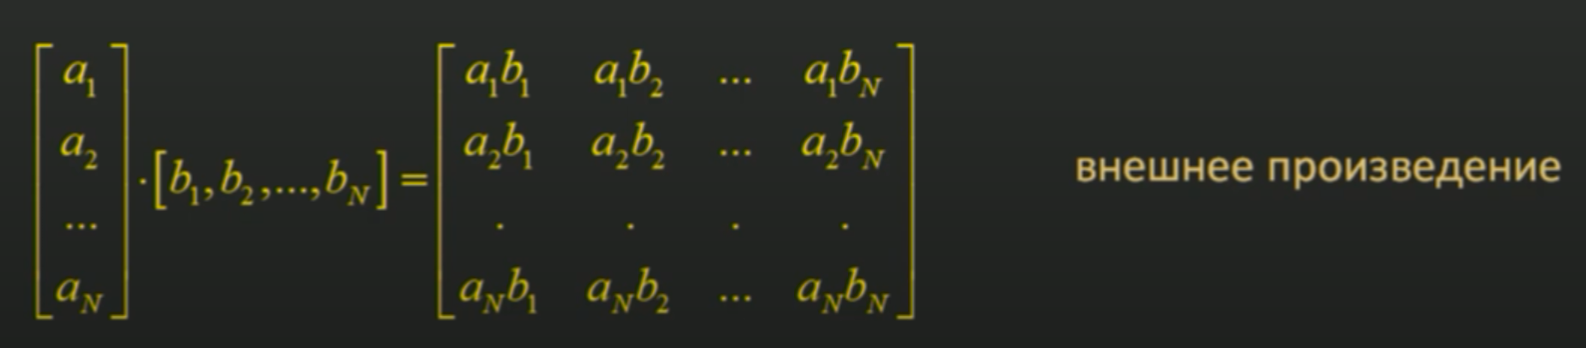

The main two rules for matrix multiplication to remember are:

1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

Матричное умножение

In [76]:
a = torch.rand(2, 3)
b = torch.rand(2, 3, 3)

In [77]:
torch.matmul(a, b.mT)  # матричное произведение тензоров

tensor([[[0.3577, 0.2625, 0.8010],
         [0.8266, 0.6259, 0.9939]],

        [[0.4134, 0.5869, 0.5449],
         [0.9560, 1.0229, 1.0395]]])

In [78]:
torch.mm(a.T, b.view(2, 9))  # матричное произведение тензоров

tensor([[0.3684, 1.0638, 0.6001, 0.4836, 0.6967, 0.7152, 0.9958, 0.4939, 0.8540],
        [0.2099, 0.5256, 0.5266, 0.3907, 0.5142, 0.3285, 0.4321, 0.2635, 0.7268],
        [0.1770, 0.4540, 0.4197, 0.3143, 0.4182, 0.2876, 0.3824, 0.2247, 0.5812]])

In [79]:
a = torch.rand(3, 3, 3)
b = torch.rand(3, 3, 10)

In [80]:
torch.bmm(a, b)  # Пакетное умножение матриц (batch)

tensor([[[1.2099, 0.7663, 1.6371, 1.2461, 1.0795, 1.2702, 1.1077, 1.2915,
          0.8827, 1.5555],
         [0.5255, 0.3170, 0.6878, 0.7830, 0.3595, 0.7097, 0.4775, 0.5893,
          0.5490, 0.6904],
         [0.7181, 0.5445, 1.0270, 0.6943, 0.6606, 0.6617, 0.7934, 0.5708,
          0.3229, 0.7796]],

        [[0.4774, 0.1224, 0.3600, 0.3787, 0.3008, 0.1161, 0.1524, 0.4779,
          0.2718, 0.3456],
         [1.3719, 0.9789, 1.1799, 1.1131, 1.2191, 0.4221, 0.9448, 2.0110,
          0.9386, 1.3801],
         [0.5118, 0.1467, 0.3141, 0.4132, 0.2614, 0.1158, 0.1743, 0.4995,
          0.2769, 0.2975]],

        [[1.0449, 0.6676, 0.3388, 0.5983, 0.5820, 1.0621, 0.8740, 1.6721,
          0.7278, 0.7744],
         [0.7211, 0.3759, 0.5112, 0.4212, 0.5914, 0.8092, 0.4620, 1.5697,
          0.5784, 1.0175],
         [0.3881, 0.3317, 0.5704, 0.3238, 0.5483, 0.7610, 0.2329, 1.2821,
          0.3895, 0.8505]]])

Скалярное и внешнее произведение матриц

In [81]:
a = torch.arange(0, 5, dtype=torch.float32)
b = torch.ones(5)

In [82]:
torch.dot(a, b)  # скалярное произведение матриц

tensor(10.)

In [83]:
torch.outer(a, b)  # внешнее произведение матриц

tensor([[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4.]])

Произведение матрицы и вектора

In [84]:
a = torch.arange(6, dtype=torch.float32)
b = torch.rand(2, 6)

In [85]:
torch.mv(b, a)  # (matrix, vector)

tensor([10.7209, 12.0005])

#### `Линейная алгебра`

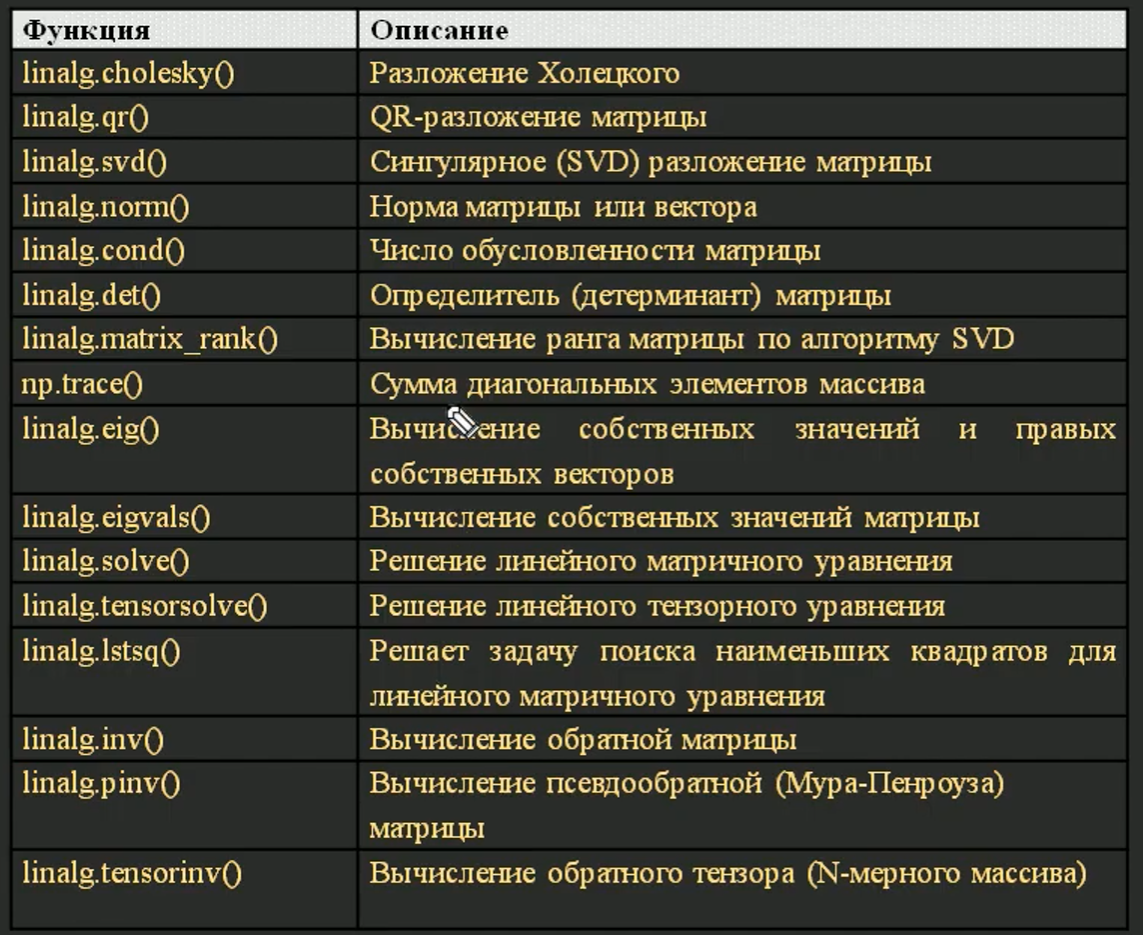

In [86]:
a = torch.FloatTensor([[1, 2, 3], [4, 5, 6], [7, 8, 90]])  # матрица коэффициентов слау
y = torch.FloatTensor([10, 20, 30])  # вектор правых частей

In [87]:
torch.linalg.matrix_rank(a)  # ранг матрицы

tensor(3)

In [88]:
torch.linalg.solve(a, y)  # получили корни слау

tensor([-3.3333,  6.6667,  0.0000])

#### Argmin / argmax

In [89]:
x = torch.arange(5, 20)

In [90]:
x.argmin()  # позиция наименьшего элемента

tensor(0)

In [91]:
x[x.argmin()]  # сам минимальный элемент

tensor(5)

In [92]:
x.argmax()  # позиция наибольшего элемента

tensor(14)

In [93]:
x[x.argmax()]  # сам максимальный элемент

tensor(19)